In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
with zipfile.ZipFile("/content/drive/Shareddrives/Pengolahan Citra Digital_Vincent Junitio Ungu/ship-and-plane-20201125T080829Z-001.zip") as f:
  f.extractall()

In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import to_categorical
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
directory = '/content/ship-and-plane'
train_directory = os.path.join(directory, 'train_data')
validation_directory = os.path.join(directory, 'train')

train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_directory, target_size = (150, 150), class_mode='categorical', batch_size = 32)
validation_generator = validation_datagen.flow_from_directory(validation_directory, target_size = (150, 150), class_mode='categorical', batch_size = 32)

Found 418 images belonging to 2 classes.
Found 296 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(64, 2, input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 2, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 149, 149, 64)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 73, 64)        16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               10616960  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

In [6]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_generator, epochs = 15, verbose = 1, validation_data=validation_generator)

Epoch 1/15
 3/14 [=====>........................] - ETA: 1s - loss: 3.4642 - accuracy: 0.5833

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 12s 851ms/step - loss: 1.9626 - accuracy: 0.5550 - val_loss: 0.7320 - val_accuracy: 0.5034
Epoch 2/15
14/14 [==============================] - 11s 812ms/step - loss: 0.6792 - accuracy: 0.5813 - val_loss: 0.5608 - val_accuracy: 0.6385
Epoch 3/15
14/14 [==============================] - 11s 790ms/step - loss: 0.4107 - accuracy: 0.7847 - val_loss: 0.3201 - val_accuracy: 0.8716
Epoch 4/15
14/14 [==============================] - 12s 828ms/step - loss: 0.2732 - accuracy: 0.8947 - val_loss: 0.2224 - val_accuracy: 0.9189
Epoch 5/15
14/14 [==============================] - 11s 812ms/step - loss: 0.1909 - accuracy: 0.9139 - val_loss: 0.1278 - val_accuracy: 0.9561
Epoch 6/15
14/14 [==============================] - 11s 807ms/step - loss: 0.1925 - accuracy: 0.9234 - val_loss: 0.2098 - val_accuracy: 0.9223
Epoch 7/15
14/14 [==============================] - 11s 814ms/step - loss: 0.1956 - accuracy: 0.9187 - val_loss: 0.2084 - val_accuracy: 0.9291
Epoch 8/15

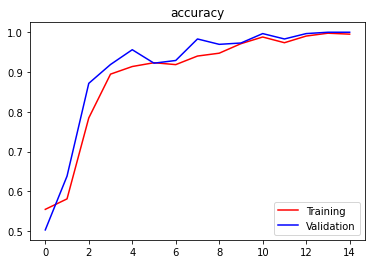

<Figure size 432x288 with 0 Axes>

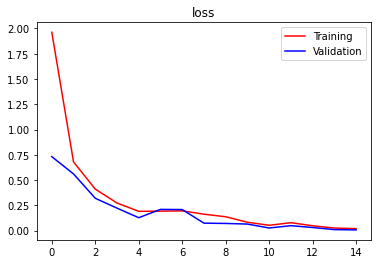

<Figure size 432x288 with 0 Axes>

In [8]:
def plot_graph(epochs, string, history):
  plt.plot(epochs, history.history[string], 'r', label='Training')
  plt.plot(epochs, history.history['val_'+string], 'b', label='Validation')
  plt.title(string)
  plt.legend(loc=0)
  plt.figure()
  plt.show()

epochs = range(15)

plot_graph(epochs, 'accuracy', history)
plot_graph(epochs, 'loss', history)

In [9]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150, 3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  if (np.argmax(classes)==0):
    print("Plane")
  else:
    print("Ship")

Saving Plane 1.jpg to Plane 1.jpg
Saving Plane 2.jpg to Plane 2.jpg
Saving Plane 3.jpg to Plane 3.jpg
Saving Ship 1.jpg to Ship 1.jpg
Saving Ship 2.jpg to Ship 2.jpg
Saving Ship 3.jpg to Ship 3.jpg
Plane
Plane
Plane
Ship
Ship
Ship
